# Seasonal cycles

This notebook shows how to use the seasonal cycles diagnostic. Here we focus on the `SeasonalCycles` for the single model evaluation and the `PlotSeasonalCycles` for the multi model plots.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.timeseries import SeasonalCycles

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [4]:
sc_dataset = SeasonalCycles(**dataset_dict, **common_dict)

2025-06-19 11:34:29 :: Seasonalcycles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


In [5]:
run_dict = {'var': '2t',
            'units': 'degC'}

In [6]:
sc_dataset.run(**run_dict)

2025-06-19 11:34:29 :: Seasonalcycles :: INFO     -> Running SeasonalCycles for 2t


2025-06-19 11:34:29 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-06-19 11:34:30 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-06-19 11:34:30 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-06-19 11:34:30 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-06-19 11:34:30 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-06-19 11:34:30 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-06-19 11:34:30 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-06-19 11:35:31 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-06-19 11:35:31 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-06-19 11:35:31 :: Regridder :: INFO     -> Grid name: lon-lat
2025-06-19 11:35:31 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep

In [7]:
sc_obs = SeasonalCycles(**obs_dict, **common_dict)
sc_obs.run(**run_dict, std=True)

2025-06-19 11:35:33 :: Seasonalcycles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-06-19 11:35:33 :: Seasonalcycles :: INFO     -> Running SeasonalCycles for 2t
2025-06-19 11:35:33 :: ConfigPath :: INFO     -> ERA5_era5_monthly triplet found in in obs!


2025-06-19 11:35:33 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-06-19 11:35:33 :: Fixer :: INFO     -> Fix names in metadata is ERA5-destine-v1
2025-06-19 11:35:33 :: Fixer :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2025-06-19 11:35:33 :: Reader :: INFO     -> Grid metadata is era5-r025s
2025-06-19 11:35:33 :: Regridder :: INFO     -> Grid name: era5-r025s
2025-06-19 11:35:33 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_era5-r025s.nc.
2025-06-19 11:35:33 :: CoordTransator :: INFO     -> Grid type: Regular
2025-06-19 11:35:33 :: CoordTransator :: INFO     -> Target data model: aqua
2025-06-19 11:35:33 :: CoordTransator :: INFO     -> Loading data model from /users/mattnuri/.aqua/data_model/aqua.yaml
2025-06-19 11:35:33 :: CoordTransator :: INFO     -> Analysing coordinate: latitude
2025-06-19 11:35:33 :: CoordTransator :: INFO     -> Reversing coordinate lat from decre

In [8]:
from aqua.diagnostics.timeseries import PlotSeasonalCycles

In [9]:
plot_dict = {'monthly_data': sc_dataset.monthly,
             'ref_monthly_data': sc_obs.monthly,
             'std_monthly_data': sc_obs.std_monthly,
             'loglevel': 'INFO'}

2025-06-19 11:36:13 :: create_folder :: INFO     -> Creating folder ./png
2025-06-19 11:36:14 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/seasonalcycles.seasonalcycles.climatedt-phase1.ICON.historical-1990.obs.ERA5.era5.2t.png
2025-06-19 11:36:14 :: OutputSaver :: INFO     -> Saved PNG: ./png/seasonalcycles.seasonalcycles.climatedt-phase1.ICON.historical-1990.obs.ERA5.era5.2t.png


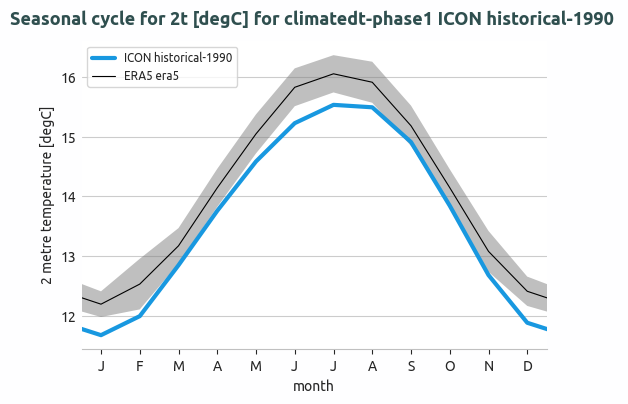

In [10]:
plot = PlotSeasonalCycles(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_seasonalcycles(data_labels=data_labels, ref_label=ref_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)